In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from pathlib import Path
import sys
project_path = str(Path().joinpath('..', 'triple_agent').resolve())
sys.path.append(project_path)
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [14]:
from triple_agent.replays.get_parsed_replays import get_parsed_replays
from triple_agent.utilities.event_constants import SCL5_DROPPED_PLAYERS, SCL5_DIVISIONS, select_scl5
from triple_agent.utilities.scl_set import sort_games_into_sets
from triple_agent.reports.scl_set_scores import scl_set_scores_categorize
import matplotlib.pyplot as plt

In [15]:
scl5_replays = get_parsed_replays(select_scl5)

In [5]:
scl5_sets = sort_games_into_sets(scl5_replays)

In [19]:
scores = [(6,6),(7,5),(7,4),(7,3),(7,2),(7,1),(7,0)]
compliant_scl5_sets = list(filter(lambda s: tuple(sorted(s.score, reverse=True)) in scores and s.division != 'Challenger', scl5_sets))

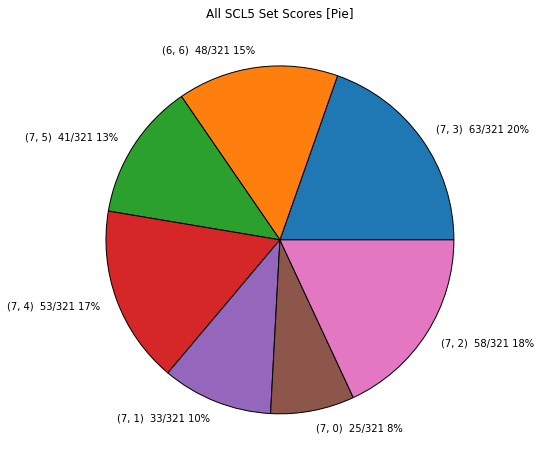

In [20]:
scl_set_scores_categorize(compliant_scl5_sets, 'All SCL5 Set Scores [Pie]')

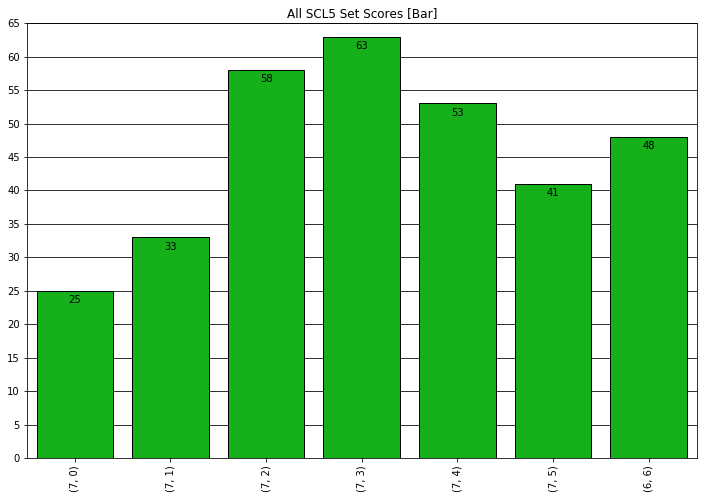

In [21]:
scl_set_scores_categorize(
    compliant_scl5_sets,
    'All SCL5 Set Scores [Bar]',
    category_name_order=lambda s: (sum(s), -s[0]),
    force_bar=True)

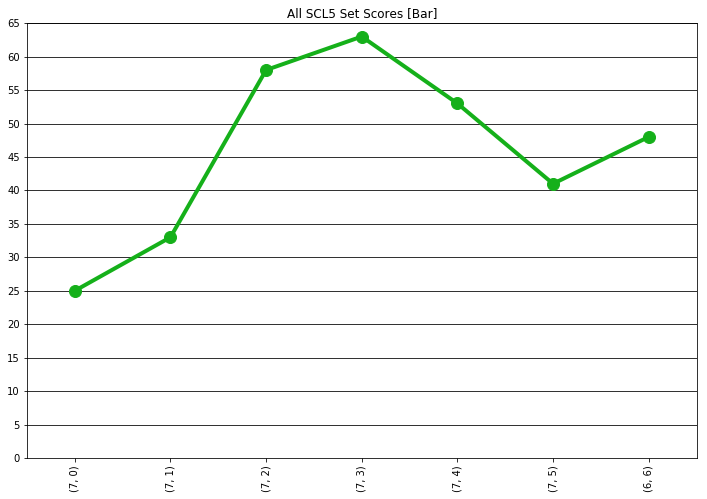

In [22]:
scl_set_scores_categorize(
    compliant_scl5_sets,
    'All SCL5 Set Scores [Bar]',
    category_name_order=lambda s: (sum(s), -s[0]),
    force_line=True)

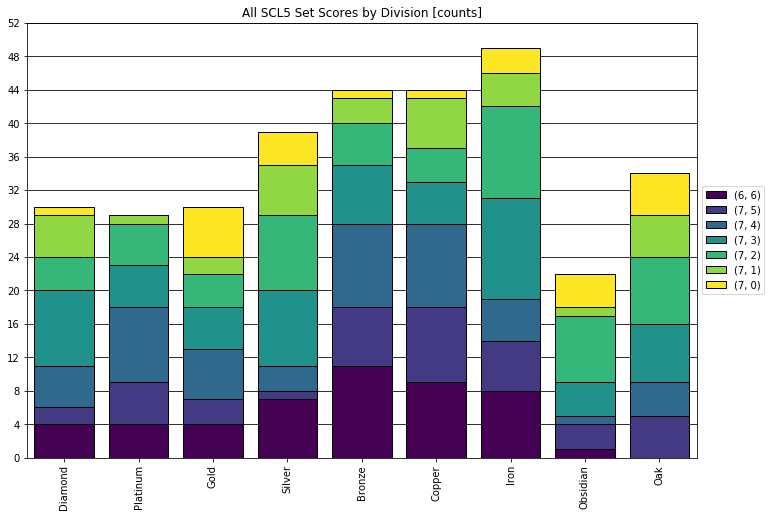

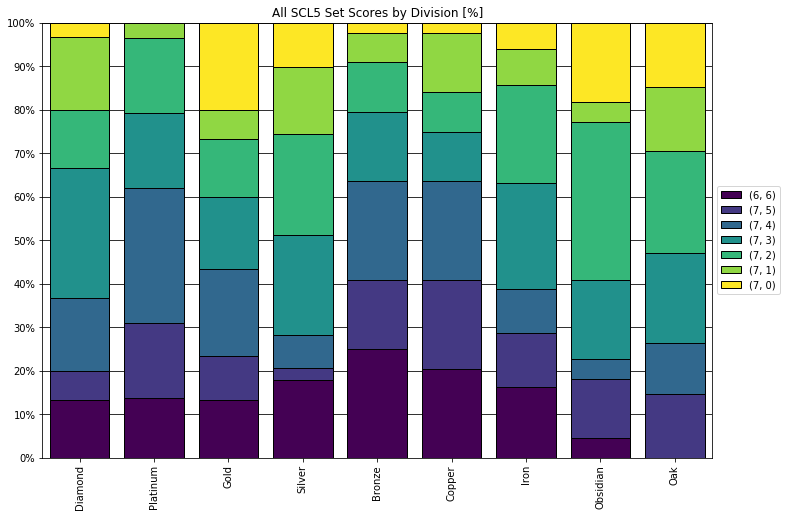

In [23]:
cmap = plt.get_cmap('viridis', len(scores))

color_dict = {score:cmap(i) for i,score in enumerate(scores)}

scl_set_scores_categorize(
    compliant_scl5_sets,
    'All SCL5 Set Scores by Division',
    groupby=lambda s: s.division,
    data_stack_order = scores,
    data_color_dict = color_dict,
    category_name_order=lambda s: SCL5_DIVISIONS.index(s),
)